# 2-5 梯度下降

### 什么是梯度

梯度是导数对多元函数的推广，它是多元函数对各自自变量**偏导数**形成的**向量**。

$$
grad\ f(x_0,x_1,...,x_n) = \left(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1},...,\frac{\partial f}{\partial x_n} \right)
$$

梯度也可以表示为哈密顿算子 $\nabla f$.

例如：$f(x_1,x_2) = x_1^2+x_2^2+x_1x_2$的梯度为 $\left(2x_1+x_2, 2x_2+x_1 \right)$

### 什么是梯度下降法

梯度下降法是一个用来求函数（局部）最小值的**迭代算法**。

梯度下降法的步骤：
1. 给定一个初始点 $x^0$，令 $k=0$
2. 求出负梯度方向作为搜索方向 $d^k$
3. 确定搜索步长 $\lambda_k$，使得 $f(x^k+\lambda_kd^k)<f(x^k)$ （大多数时候采用固定步长，即机器学习中所说的学习率）
4. 令 $x^{k+1} = x^k+\lambda_kd^k, k:=k+1$
5. 判断 $x^k$ 是否满足停止条件。是则停止，否则转第二步

本来梯度下降法每次迭代的步长可以由其他搜索技术确定一个最优步长，但是机器学习中往往使用固定学习率作为迭代步长，因此这里就不再解释上述算法第3步。

### 为什么是负梯度方向

因为函数值下降最快的方向就是负梯度方向 $-\nabla f(x^k)$

证明：略

### 迭代公式

$$
x^{k+1} = x^{k} - \lambda \nabla f(x^k)
$$

其中 $\lambda$ 为迭代步长亦称学习率

### 流程图

<img src="./img/2_5_p0.png" style="zoom:80%" />

图中 $\varepsilon$ 表示精度要求，即梯度向量的模长 $\|\nabla f(x^k)\|$ 小于等于该精度要求时停止迭代

图中 $\alpha$ 表示迭代步长，这里每次都求了一个最优步长而非固定步长

### 简单示例

假设求目标函数 $J(\theta) = \theta^2$ 的最小值，即：

$$
min \ J(\theta) = \theta^2
$$

初始值 $\theta^0 = 1$，学习率 $\alpha = 0.4$

因为是一元函数，梯度即为导数，因此 $J'(\theta) = 2\theta$


**第一次迭代：**  
$$
\begin{align}
\theta^1 &= \theta^0 - \alpha J'(\theta^0)\\
         &= 1 - 0.4\times2\\
         &= 0.2
\end{align}
$$

**第二次迭代：**  
$$
\begin{align}
\theta^2 &= \theta^1 - \alpha J'(\theta^1)\\
         &= 0.2 - 0.4\times0.4\\
         &= 0.04
\end{align}
$$

**第三次迭代：**
...

### 程序演示

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def J(theta):
    """目标函数"""
    return theta**2

def grad(theta):
    """目标函数的导函数"""
    return 2*theta

# 初始值和学习率
theta_0 = 1
learn_rate = 0.4

# 梯度下降迭代
thetas = [1]
for i in range(3):
    next_theta = thetas[i]-learn_rate*grad(thetas[i])
    thetas.append(next_theta)

print(thetas)

[1, 0.19999999999999996, 0.03999999999999998, 0.007999999999999993]


可以看到迭代三次后的 $\theta^3$ 已经非常接近真正的极小值点 $0$ 了，为了直观下面绘制出图像

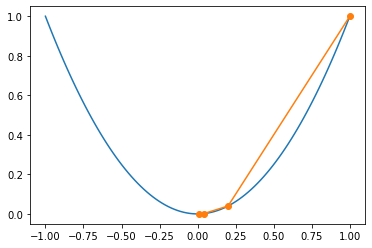

In [23]:
# 绘制图像
J_thetas = [J(theta) for theta in thetas]  # 求出每一个theta对应的J(theta)
plt.plot(x, y)
plt.plot(thetas, J_thetas, marker='o')
plt.show()